In [1]:
import pandas as pd

df = pd.read_csv('../data/db/preprocessed_agromarket.csv')
df.head()

,일자,부류,품목,품종,도매시장,물량(kg),금액(원)
0,20190201,버섯류,새송이,새송이버섯(일반),강릉,1303.0,4081500.0
1,20190201,조미채소류,마늘,마늘쫑(수입),강릉,224.0,586000.0
2,20190201,조미채소류,마늘,깐마늘,강릉,1287.0,7259700.0
3,20190201,조미채소류,마늘,풋마늘,강릉,210.0,491000.0
4,20190201,조미채소류,풋고추,아삭이,강릉,62.0,244000.0


In [2]:
import matplotlib.pyplot as plt

In [3]:
# 한글 폰트 설정 

import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False # 음수값

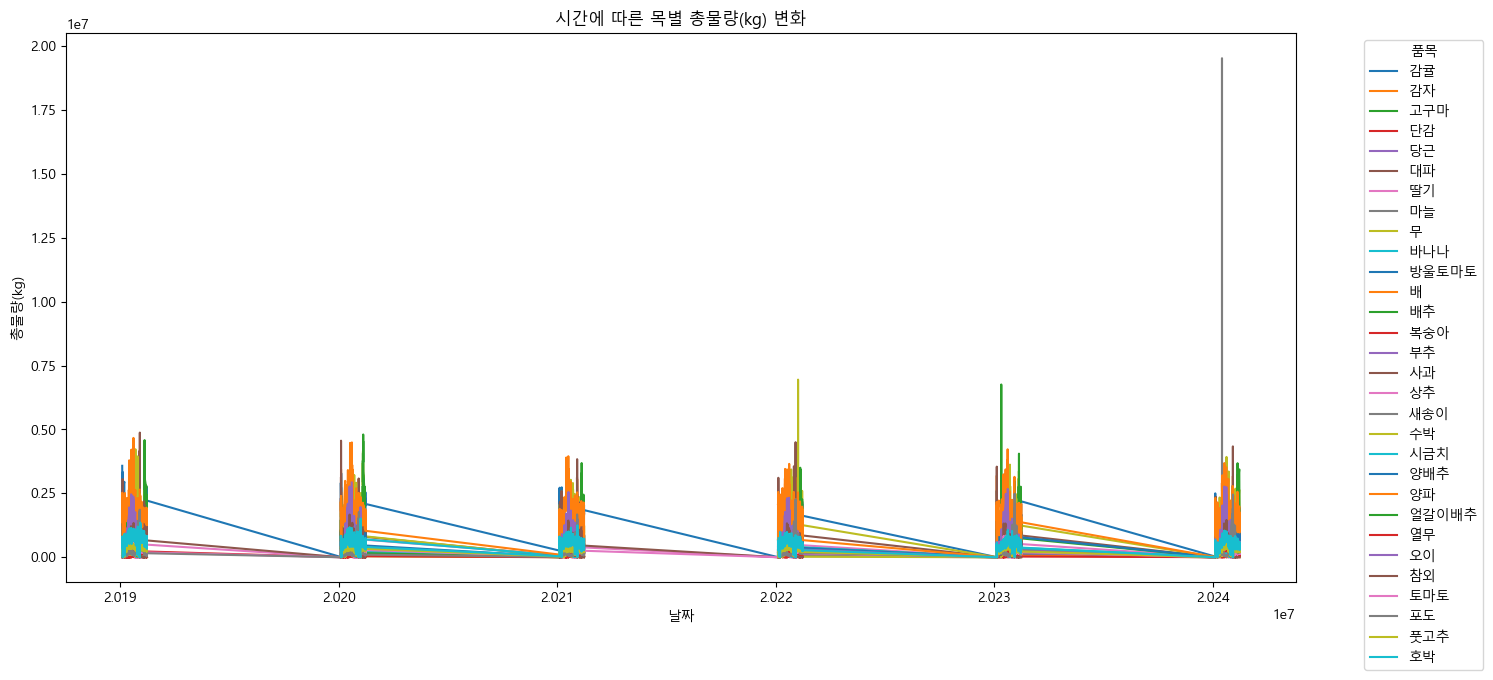

In [6]:
# 모든 품목 선택
# item_time_series = df.groupby(['품목', '일자'])['물량(kg)'].sum().unstack()
item_time_series = df[df['품목'].isin(['양파', '무', '배추', '사과', '오이', '수박', '감자', '대파', '감귤', '양배추', '호박', '바나나', '고구마', '토마토', '당근', '포도', '얼갈이배추', '배', '풋고추', '복숭아', '참외', '딸기', '상추', '방울토마토', '열무', '새송이', '부추', '단감', '시금치', '마늘'])].groupby(['품목', '일자'])['물량(kg)'].sum().unstack()
item_time_series.T.plot(figsize=(15, 7))
plt.title('시간에 따른 목별 총물량(kg) 변화')
plt.xlabel('날짜')
plt.ylabel('총물량(kg)')
plt.legend(title='품목', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()
plt.show()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390566 entries, 0 to 6390565
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   일자      int64  
 1   부류      object 
 2   품목      object 
 3   품종      object 
 4   도매시장    object 
 5   물량(kg)  float64
 6   금액(원)   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 341.3+ MB


In [9]:
df.describe

<bound method NDFrame.describe of                일자     부류   품목         품종 도매시장  물량(kg)      금액(원)
0        20190201    버섯류  새송이  새송이버섯(일반)   강릉  1303.0  4081500.0
1        20190201  조미채소류   마늘    마늘쫑(수입)   강릉   224.0   586000.0
2        20190201  조미채소류   마늘        깐마늘   강릉  1287.0  7259700.0
3        20190201  조미채소류   마늘        풋마늘   강릉   210.0   491000.0
4        20190201  조미채소류  풋고추        아삭이   강릉    62.0   244000.0
...           ...    ...  ...        ...  ...     ...        ...
6390561  20241202    과실류   사과         후지   포항  1040.0  2736300.0
6390562  20241202    과실류   사과         후지   포항  2040.0  5625700.0
6390563  20241202    과실류   사과         후지   포항   720.0  1551500.0
6390564  20241202     서류  고구마         기타   포항    50.0    47400.0
6390565  20241202     서류   감자       기타감자   포항  1260.0  1387700.0

[6390566 rows x 7 columns]>

In [16]:
# 특정 조건에 맞는 데이터 필터링
df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')
filtered_data = df[(df['일자'] == '2024-04-11') & 
                   (df['품목'] == '마늘') & 
                   (df['도매시장'].str.contains('부산'))]

print(filtered_data)

                일자     부류  품목       품종  도매시장      물량(kg)        금액(원)
2065842 2024-04-11  조미채소류  마늘   깐마늘 남도  부산반여  19400000.0  137371344.0
2065843 2024-04-11  조미채소류  마늘   깐마늘 대서  부산반여      1800.0   10650000.0
2065844 2024-04-11  조미채소류  마늘   깐마늘 한지  부산반여      1640.0   10061430.0
2065845 2024-04-11  조미채소류  마늘  마늘쫑(수입)  부산반여       248.0     868000.0
2065846 2024-04-11  조미채소류  마늘  마늘쫑(수입)  부산반여       154.0     616000.0
2065847 2024-04-11  조미채소류  마늘  마늘쫑(수입)  부산반여       180.0     420000.0
2065848 2024-04-11  조미채소류  마늘      마늘쫑  부산반여       190.0     964800.0
2065849 2024-04-11  조미채소류  마늘      마늘쫑  부산반여       200.0    1042000.0
2065850 2024-04-11  조미채소류  마늘      마늘쫑  부산반여       138.0     998000.0
2065851 2024-04-11  조미채소류  마늘      풋마늘  부산반여        45.0     175050.0
2065852 2024-04-11  조미채소류  마늘      풋마늘  부산반여        90.0     414000.0
2065853 2024-04-11  조미채소류  마늘      풋마늘  부산반여      1942.5    5389550.0
2065854 2024-04-11  조미채소류  마늘   저장형 한지  부산반여       160.0     760000.0
2330842 2024-04-11  

In [17]:
filtered_data['물량(kg)'].sum()

np.float64(19417271.5)